## Weis & Wyckoff System

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for interactive charts, change to 'default'
# or use any method available in 'plotly renderers wiki'
render = 'png'

In [2]:
import pandas as pd
from rangedf import Range

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

r1 = Range(df_ticks, 14)
df_ohlcv = r1.range_df()

r2 = Range(df_ticks, 28)
df_htf = r2.range_df()

r3 = Range(df_ticks, 7)
df_ltf = r3.range_df()

In [3]:
from weis_wyckoff_system import WeisWyckoffSystem
ww = WeisWyckoffSystem()
# or WeisWyckoffSystem(df, df_htf, df_ltf)

#### ZigZag without HTF price lookup

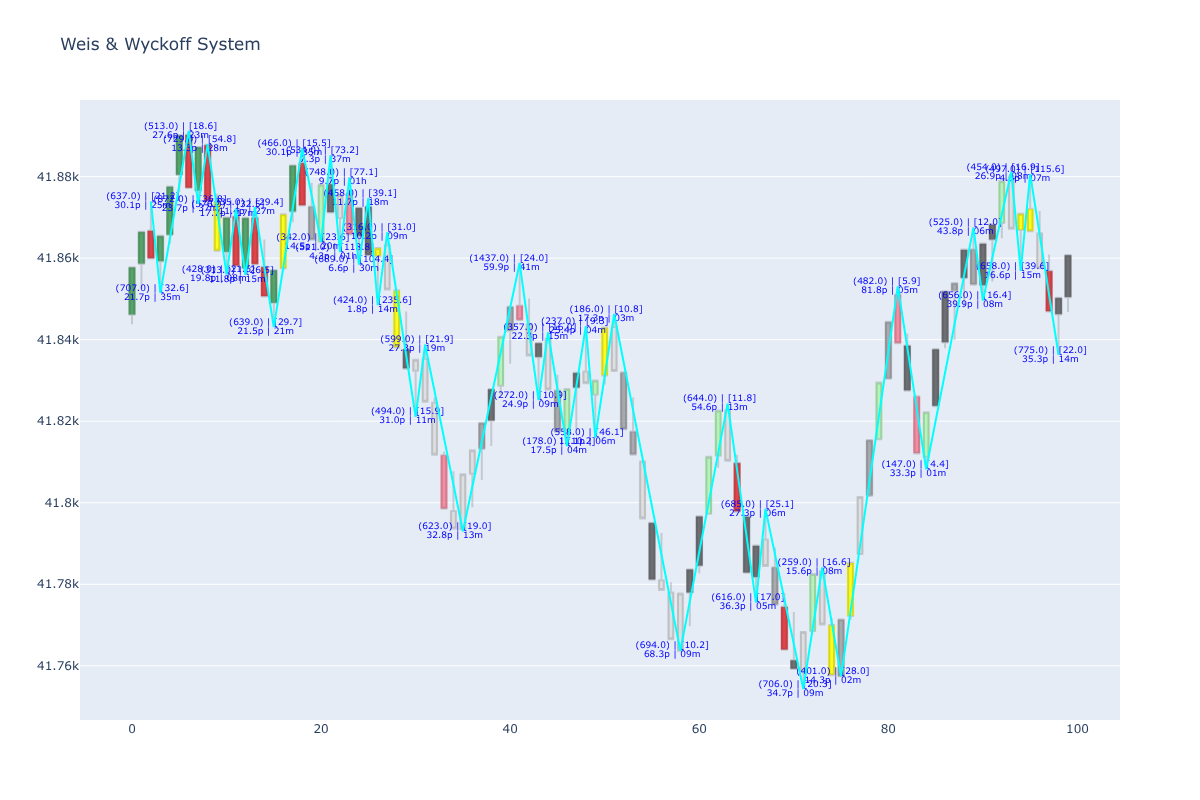

In [4]:
from models_utils.ww_models import ZigZagInit, ZigZagMode, PriorityMode

_zz = ZigZagInit(ZigZagMode.NoLag_HighLow)

df = ww.full_analysis(df_ohlcv, None, None, zigzag_init=_zz)

# or ww.full_analysis(zigzag_init=_zz)
# to use dataframes from current instance

df = df.iloc[0:100]
ww.plot(df, bar_time=False, bar_volume=False, renderer=render)

#### ZigZag with HTF price lookup

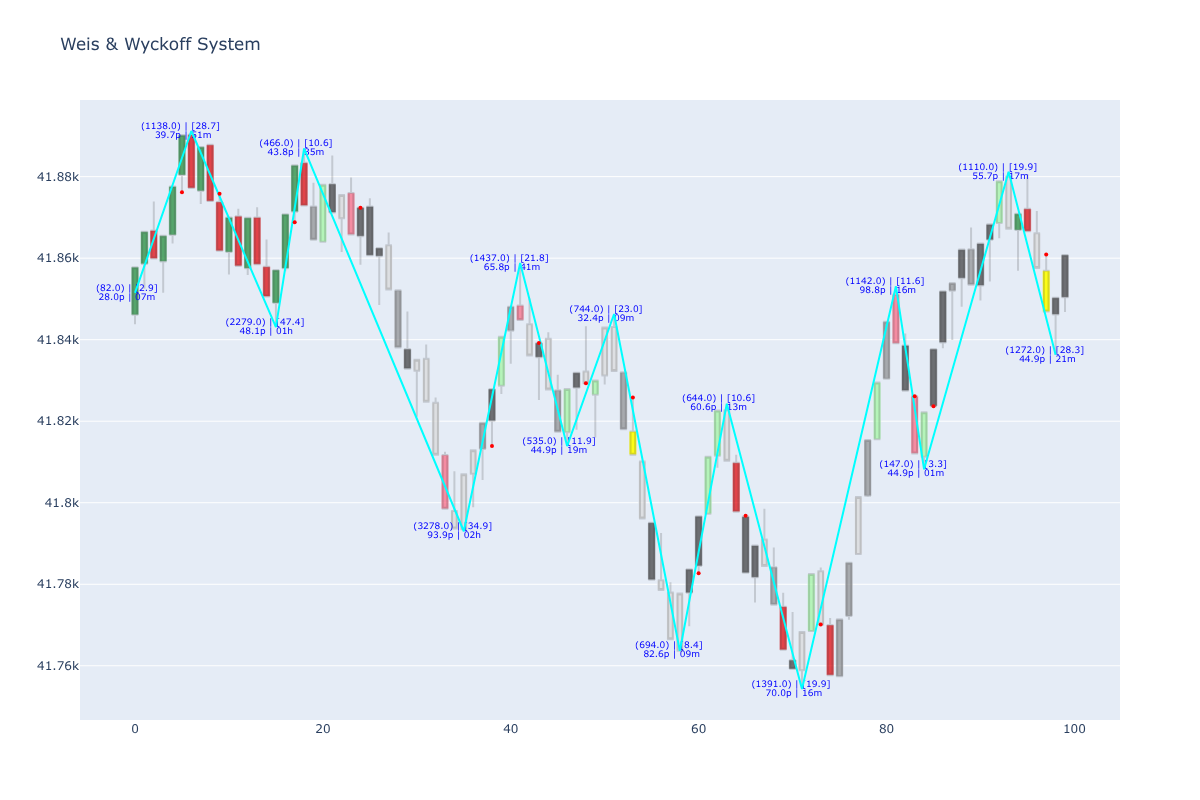

In [5]:
# HTF works with any ZigZagMode
df = ww.full_analysis(df_ohlcv, df_htf, None, zigzag_init=_zz)

df = df.iloc[0:100]
ww.plot(df, bar_time=False, bar_volume=False, turning_point=True, renderer=render)

##### Same result with 'Percentage' mode, but fine-tuning the 'pct_value' is needed

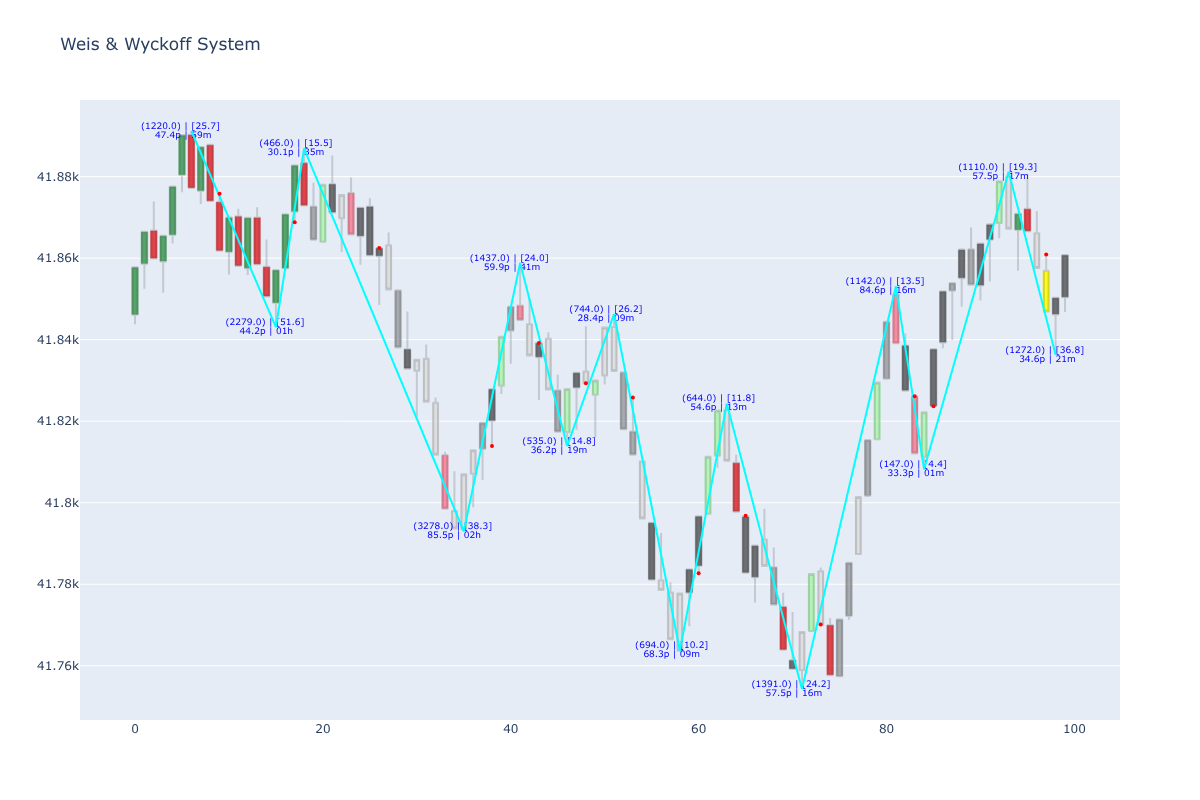

In [6]:
_zz = ZigZagInit(ZigZagMode.Percentage, pct_value=0.07)
df = ww.full_analysis(df_ohlcv, None, None, zigzag_init=_zz)
df = df.iloc[0:100]
ww.plot(df, bar_time=False, bar_volume=False, turning_point=True, renderer=render)

#### ZigZag with LTF order formation

In [7]:
df_ltf = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")

df_15min = df_ltf.resample('15min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
})

df_htf = df_ltf.resample('45min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
})

#### Let's see without LTF

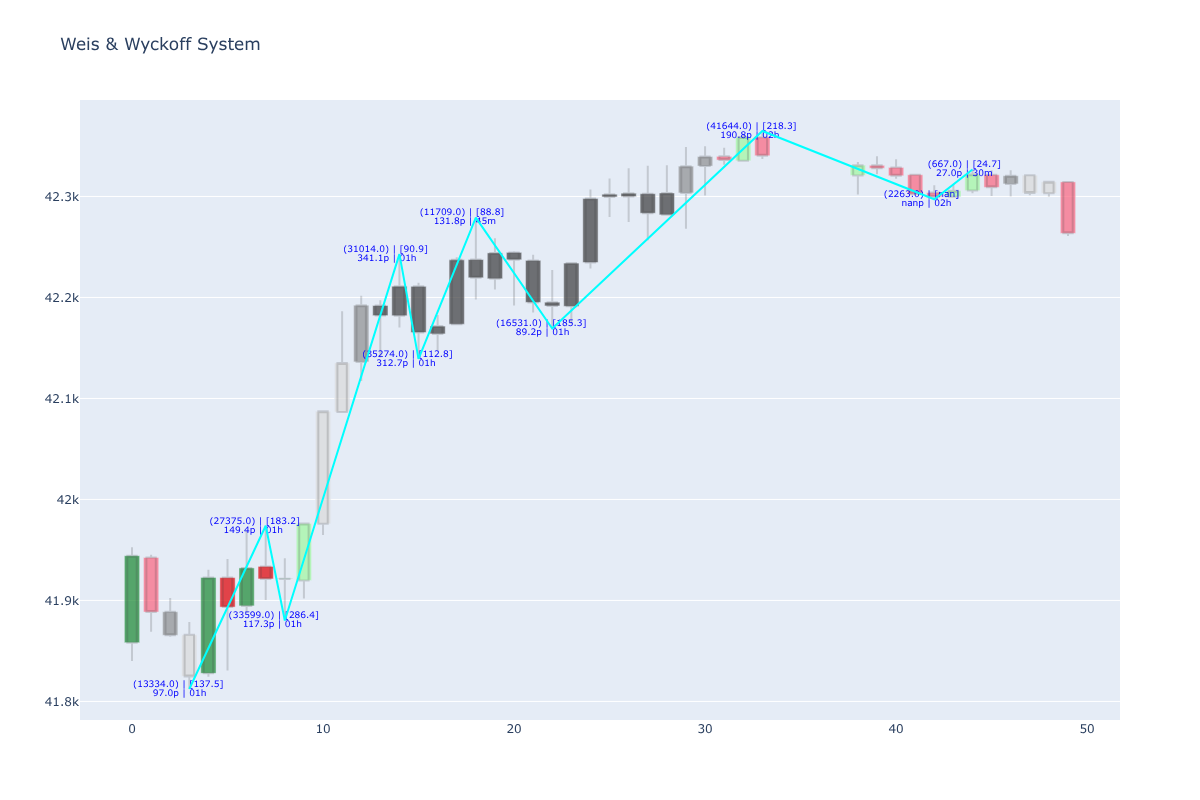

In [8]:
_zz = ZigZagInit(ZigZagMode.NoLag_HighLow, no_lag_priority=PriorityMode.No)

df = ww.full_analysis(df_15min, None, None, zigzag_init=_zz)

df = df.iloc[50:100]
ww.plot(df, bar_time=False, bar_volume=False, renderer=render)

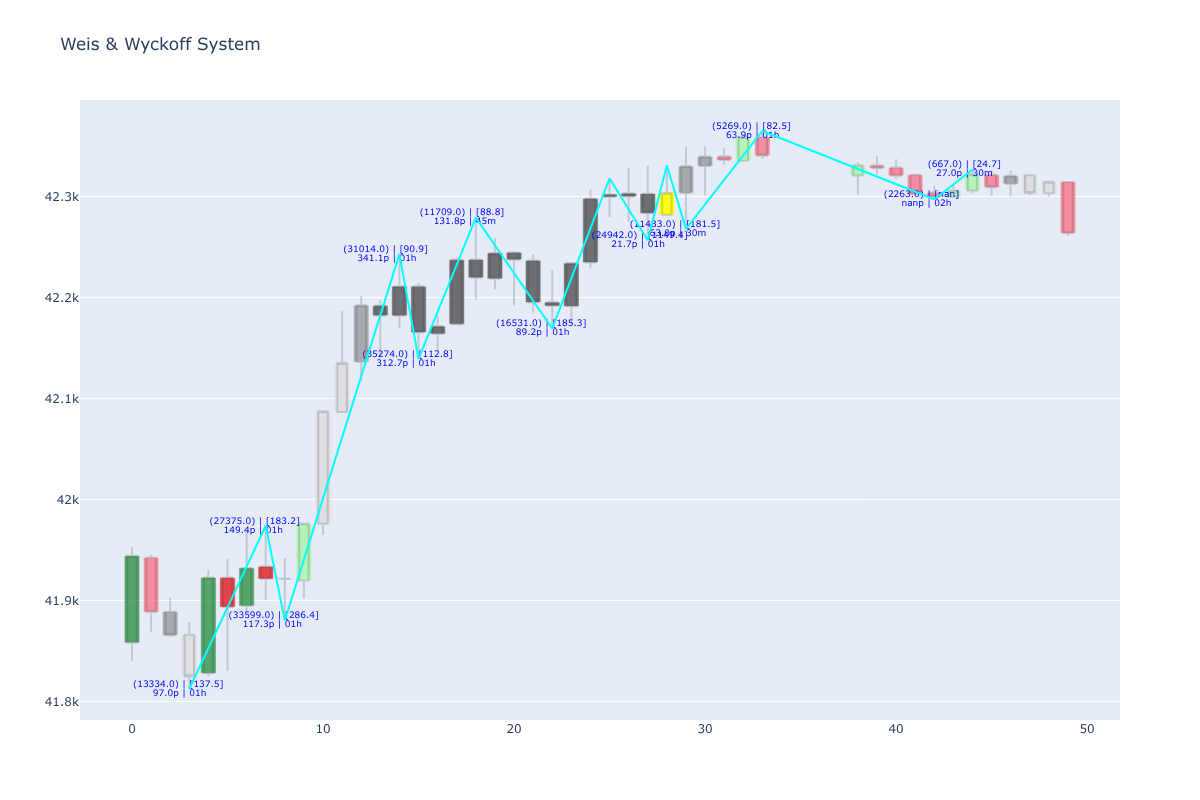

In [9]:
# LTF designed only for NoLag_HighLow with PriorityMode.Auto
_zz = ZigZagInit(ZigZagMode.NoLag_HighLow, no_lag_priority=PriorityMode.Auto)

df = ww.full_analysis(df_15min, None, df_ltf, zigzag_init=_zz)

df = df.iloc[50:100]
ww.plot(df, bar_time=False, bar_volume=False, renderer=render)

#### ZigZag with HTF price lookup + LTF order formation

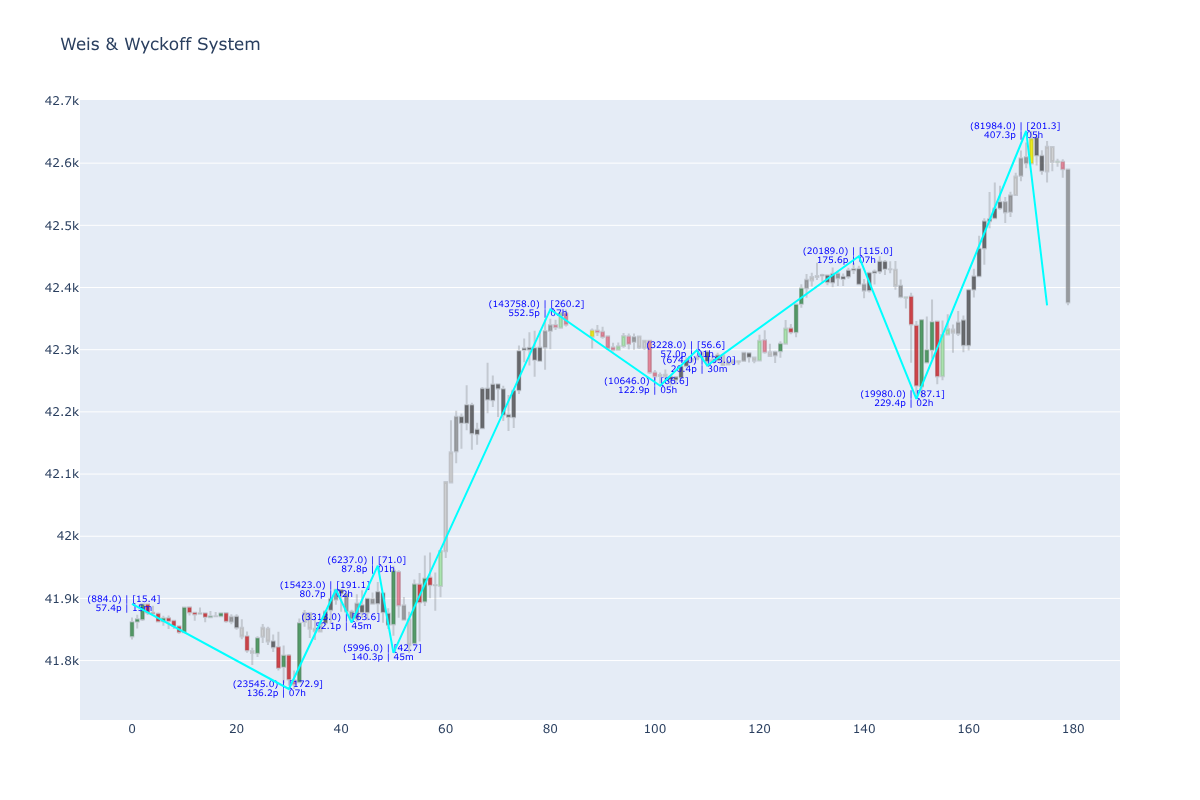

In [10]:
# HTF without LTF
_zz = ZigZagInit(ZigZagMode.NoLag_HighLow, no_lag_priority=PriorityMode.No)

df = ww.full_analysis(df_15min, df_htf, None, zigzag_init=_zz)

df = df.iloc[0:300]
ww.plot(df, bar_time=False, bar_volume=False, renderer=render)

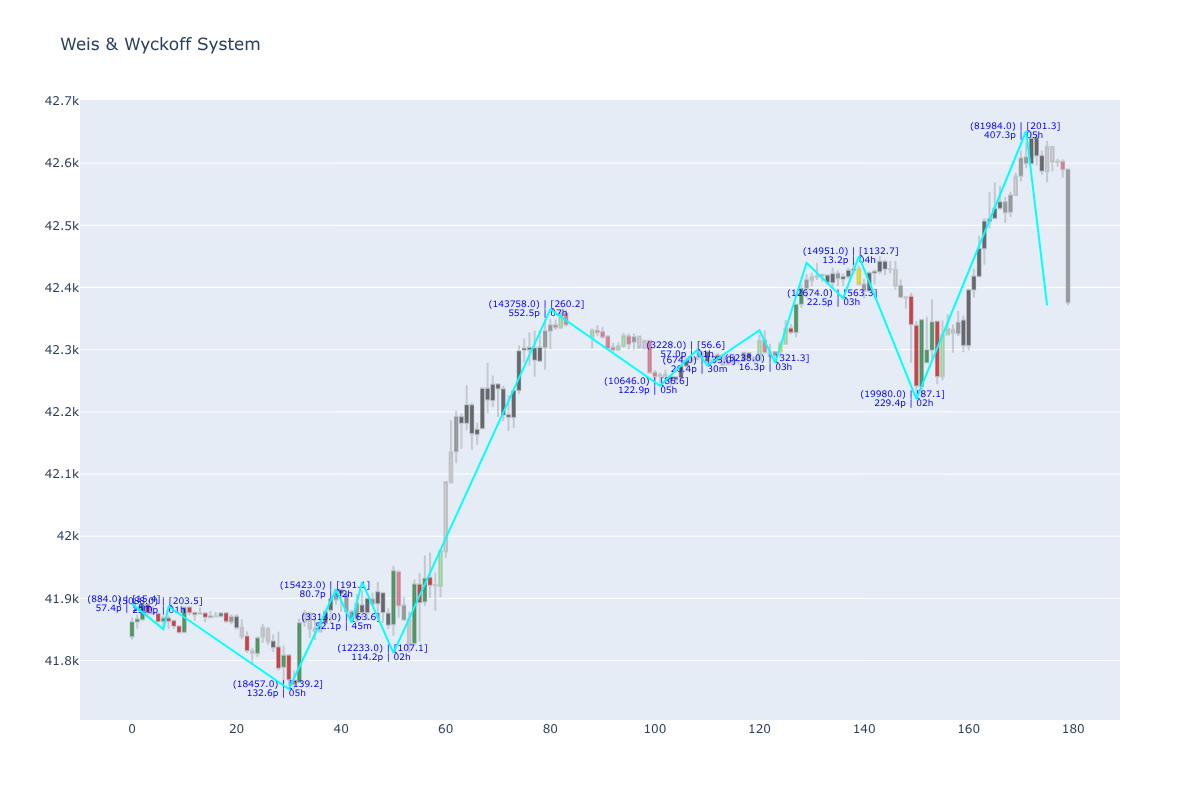

In [11]:
# HTF + LTF
_zz = ZigZagInit(ZigZagMode.NoLag_HighLow, no_lag_priority=PriorityMode.Auto)

df = ww.full_analysis(df_15min, df_htf, df_ltf, zigzag_init=_zz)

df = df.iloc[0:300]
ww.plot(df, bar_time=False, bar_volume=False, renderer=render)